# 6. Timing and Style

## 6.1 Style

> "Any code of your own that you haven't looked at for six or more months might as well have been written by someone else." - Eagleson's law


So far we've discussed code as a way to communicate with a machine. Functionally this is the purpose of writing code. However, as with any writing, code is also meant to communicate with other humans, and the best programmers don't write code for computers, they write code for humans.

To encourage good style practices, Python has developed its own set of rules for writing good, readable code. This is known as the Python style guide, and you can find all the details at the [Python website](https://www.python.org/dev/peps/pep-0008/)

We'll go over some basic rules for good code, but in general, the best way you can learn to write better code is to look at how experts write code. A good way to do this is to go on github and look at the source code for some of the most popular Python packages, such as [Keras](https://github.com/keras-team/keras/tree/master/keras) and [scikit-learn](https://github.com/scikit-learn/scikit-learn/tree/master/sklearn) 

### Make your names useful

In [42]:
def f():
    return None

def return_nothing():
    return None

These functions do exactly the same thing, but which one is better? That's right! the one with a name that tells the user what the function does. The same goes with variables and arguments...

In [43]:
def f(x, a, b):
    return a + b * x

def linear_function(x_values, intercept, slope):
    return intercept + slope * x_values

Which one is better? Again, the one with the useful names. Always name things so that the person using the code knows whats happening.

### Keep your code concise
> "Measuring programming progress by lines of code is like measuring aircraft building progress by weight" - Bill Gates

In [44]:
def linear_function(x_values, intercept, slope):
    slope_x = slope * x_values
    y = intercept
    y += slope_x
    return y

def linear_function(x_values, intercept, slope):
    return intercept + slope * x_values

Again, these functions do the same thing, but the one with fewer lines of code is better because it's easier to read.

### Write your code so you don't need comments


## 6.2 Comments, and Documentation

>"Commenting your code is like cleaning your bathroom - you never want to do it, but it really does create a more pleasant experience for you and your guests." - Ryan Campbell

## 6.3 Algorithmic complexity

>"Debugging time increases as a square of the program’s size." - Chris Wenham

So far we've mostly worked with toy examples. In other words, our examples have been small and they run fast. However, at some point you will reach the limits of what is possible with your current machine, and this is where having a good understanding of **algorithmic complexity** comes into play. 

Not all algorithms are built the same, and, in general, algorithms can be described in terms of the computation time they need to run and the amount of memory they need to make the computation. These two properties are known as **"computational complexity"** and **"memory complexity"** respectively.

The complexity of an algorithm (typically a function) with respect to computation and memory are typically described using what is called **"big O notation"**. This is just a way of describing the complexity of the algorithm in regard to the number of operations or required memory it needs to perform the computation for various input sizes. Where a notation like $O(n^2)$ means that the function requires squared computational time or available memory as a function of the input size $n$.

Let's look at a classic example of computational complexity, the *pairwise distance function*. In this example, we have a $n\times d$ matrix $X$ which is a a set of $n$ vector coordinates with $d$ dimensions, and we want to know the Euclidean distance between each vector $x_{i} \in X$ and all the other vectors $x_{j} \in X$ for $i,j = 0,1,2,3...,n$ where $j \neq i$. Our distances calculations should then produce the $n\times n$ matrix $D$, which contains all the pairwise distances between vectors with zeros along the diagonal.

Naively we can do this with a nested loop...

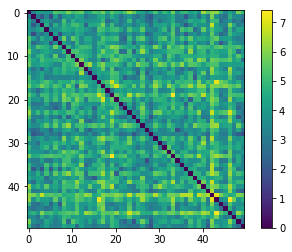

In [40]:
import numpy as np
import matplotlib.pyplot as plt

n = 50
d = 10
X = np.random.normal(size=(n, d))

def distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def loop_pairwise_distances(X):
    n = X.shape[0]
    D = np.zeros((n, n))
    for idx in range(n):
        for jdx in range(n):
            D[idx, jdx] = distance(X[idx], X[jdx])
    return D

D = loop_pairwise_distances(X)

plt.figure()
plt.imshow(D)
plt.colorbar()
plt.show()

Notice that this pairwise distance algorithm has low memory complexity as we are only calculating a single distance at a time, but there is very high computational complexity as we are having to do many operations repeatedly—$O(n^2)$ computations in this case. In fact, just for good measure, let's time our function to see how long it takes to run. We can do this with some jupyter magic using the `%timeit` command...

In [3]:
%timeit loop_pairwise_distances(X)

17.9 ms ± 150 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


That's not bad, but watch what happens when X gets bigger...

In [4]:
n = 500
X = np.random.normal(size=(n, d))
%timeit loop_pairwise_distances(X)

1.82 s ± 35.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


That's getting pretty slow! There must be a better way. Luckily numpy allows us to **vectorize** these computations, which increases our memory complexity, but also "decreases" our computational complexity. We can achieve this using **broadcasting** like so...

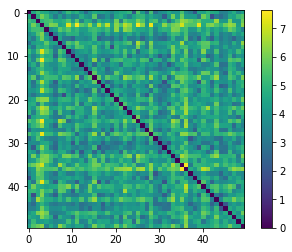

In [5]:
import numpy as np
import matplotlib.pyplot as plt

n = 50

X = np.random.normal(size=(n, d))

def vectorized_pairwise_distances(X):
    D = np.sqrt(np.sum((X - X[:, np.newaxis])**2, axis=-1))
    return D

D = vectorized_pairwise_distances(X)

plt.figure()
plt.imshow(D)
plt.colorbar()
plt.show()

Now let's check how fast this is...

In [6]:
n = 500
X = np.random.normal(size=(n, d))
%timeit loop_pairwise_distances(X)
%timeit vectorized_pairwise_distances(X)

1.84 s ± 29.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
13.8 ms ± 87.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


That's much faster! And just to make sure our functions give the same results, let's check this with numpy...

In [7]:
print(np.allclose(loop_pairwise_distances(X), vectorized_pairwise_distances(X)))

True


Great! We managed to increase the speed of our function with numpy by "decreasing" the computational complexity. Technically vectorizing your code doesn't actually decrease the computational complexity, as the number of operations are the same. In this case the vectorized version of our code is only functionally equivalent to decreasing the computational complexity as the operations are performed in parallel rather than sequentially.

However this speed-up comes at a cost. The major change is this piece of code `X - X[:, np.newaxis]` which calculates the pairwise differences using broadcasting. Let's take a closer look. First let's look out what `X[:, np.newaxis]` does...

In [8]:
print(X[:, np.newaxis].shape)

(500, 1, 10)


You can see we've added a dimension to our array `X`. In other words our rank 2 array is now a rank 3 array, so when we perform operations with our original array `X`, numpy broadcasts the operation across our new axis like so...

In [9]:
pairwise_differences = X - X[:, np.newaxis]
print(pairwise_differences.shape)

(500, 500, 10)


That's a big array! Compared to our pairwise distance matrix which is only $n\times n$, this array is $n\times n \times d$. This means the memory complexity of our vectorized pairwise distance algorithm is actually $O(dn^2)$, which is significantly higher than the memory complexity of our loop function $O(n^2)$. 

On the surface that may not seem like a big difference, but let's see what that means in terms of actual memory usage...

In [10]:
print(pairwise_differences.size / D.size)

1000.0


Yikes! That's a 1000x increase in memory usage! Just from a simple change in our code.

In general, algorithmic complexity is a constant trade-off between memory complexity and computational complexity, and the best strategy ultimately depends on the application. In this case, if you only plan on calculating pairwise distances for small arrays then the vectorized algorithm works great, but if you plan to calculate pairwise distances for much larger arrays then you may quickly run out of memory when using the vectorized version.

Figuring out the right complexity for your algorithm is something you as a programmer will have learn, and often there is no easy solution.

## 6.4 Exercise

So far we've discussed two different ways to calculate pairwise distances. Each method represents one side of the algorithmic complexity trade-off. However, there is a way to calculate pairwise distances that is *both computationally efficient and memory efficient*, but it requires some deep thought about the math behind what we're trying to calculate. 

For this excercise it's your job to figure out the algorithm that is faster than our algorithm using for loops but also memory efficient enough to calculate the pairwise distances for a large $10,000\times 1,000$ matrix. This is a case where an $O(n^2)$ algorithm is required, and our $O(dn^2)$ algorithm just won't work. However our current $O(n^2)$ algorithm is way too slow, so we need to develop a new one.

Here is a hint: $ (x - y)^2 = (x - y)(x - y) $

In [19]:
n = 10000
d = 1000
X = np.random.normal(size=(n, d))
print(X.shape)

(10000, 1000)


In [20]:
# don't run this, you'll crash your computer!
# vectorized_pairwise_distances(X) # MEMORY ERROR!

In [21]:
# don't run this, you'll be waiting forever!
# loop_pairwise_distances(X)

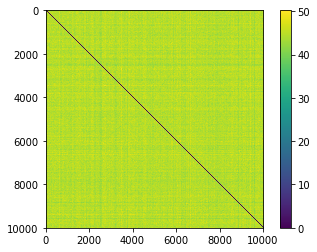

In [22]:
import jakes_secret_module as jake

D = jake.pairwise_distances(X)

plt.imshow(D)
plt.colorbar()
plt.show()

Just to prove the results are the same...

In [23]:
n = 100
d = 10
X = np.random.normal(size=(n, d))

print(np.allclose(jake.pairwise_distances(X), loop_pairwise_distances(X)))
print(np.allclose(jake.pairwise_distances(X), vectorized_pairwise_distances(X)))


True
True
